In [1]:
import pandas as pd

df = pd.read_parquet("soft-search-awards.parquet")
len(df)

2545

In [2]:
# Filter None abstracts
df = df.dropna(subset=["abstractText"])
len(df)

2543

In [3]:
from soft_search.label import load_soft_search_model
model = load_soft_search_model()

df["prediction"] = model.predict(df.abstractText)
df["prediction"].value_counts()

/home/eva/miniforge-pypy3/envs/eager/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


software-not-predicted    2199
software-predicted         344
Name: prediction, dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set_theme(
    style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False}
)
sns.set_style("darkgrid", {"grid.color": "#000000", "grid.linestyle": ":"})
sns.set_palette(
    [
        "#ff6a75",  # cherry-red
        "#0060df",  # ocean-blue
        "#068989",  # moss-green
        "#712290",  # purple
        "#FFA537",  # orange
        "#FF2A8A",  # pink
        "#9059FF",  # lavender
        "#00B3F5",  # light-blue / sky-blue
        "#005e5e",  # dark blueish green
        "#C50143",  # dark-red / maroon
        "#3fe1b0",  # seafoam / mint
        "#063F96",  # dark-blue / navy-blue
        "#FFD567",  # banana-yellow
    ]
)

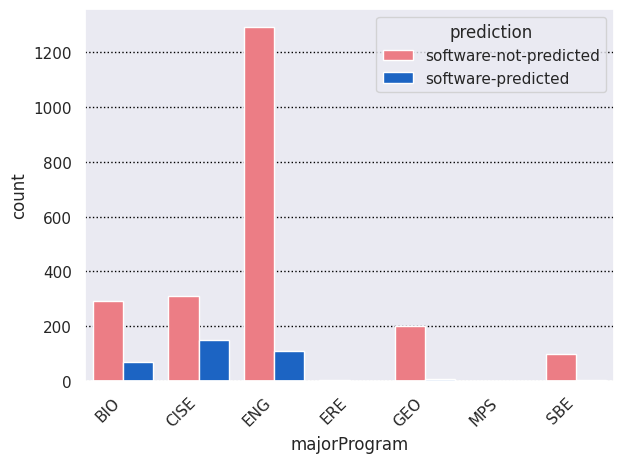

In [5]:
sns.countplot(data=df, x="majorProgram", hue="prediction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

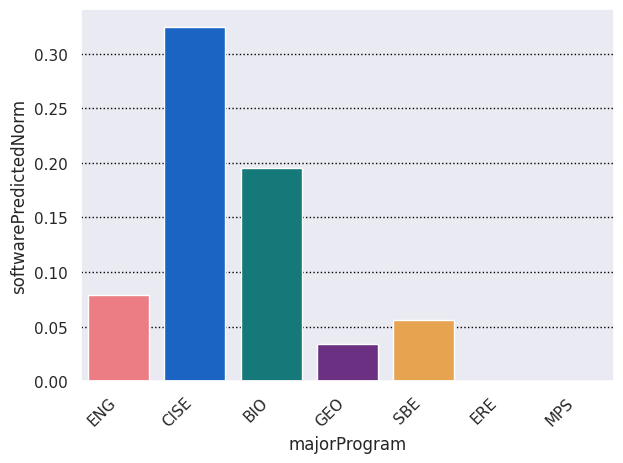

In [6]:
# Normalize
norms = []
for i, count in df.majorProgram.value_counts().items():
    program_preds = df[df.majorProgram == i].prediction.value_counts()
    try:
        predicted_count = program_preds.loc["software-predicted"]
    except KeyError:
        predicted_count = 0
    try:
        not_predicted_count = program_preds.loc["software-not-predicted"]
    except KeyError:
        not_predicted_count = 0

    norms.append({
        "majorProgram": i,
        "totalCount": count,
        "softwarePredictedCount": predicted_count,
        "softwareNotPredictedCount": not_predicted_count,
        "softwarePredictedNorm": predicted_count / count,
        "softwareNotPredictedNorm": not_predicted_count / count,
    })

norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="majorProgram", y="softwarePredictedNorm")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [7]:
df["startYear"] = df.startDate.apply(lambda d: d.split("/")[-1])
df["expYear"] = df.expDate.apply(lambda d: d.split("/")[-1])
df["awardDuration"] = df.apply(lambda r: int(r.expYear) - int(r.startYear), axis=1)

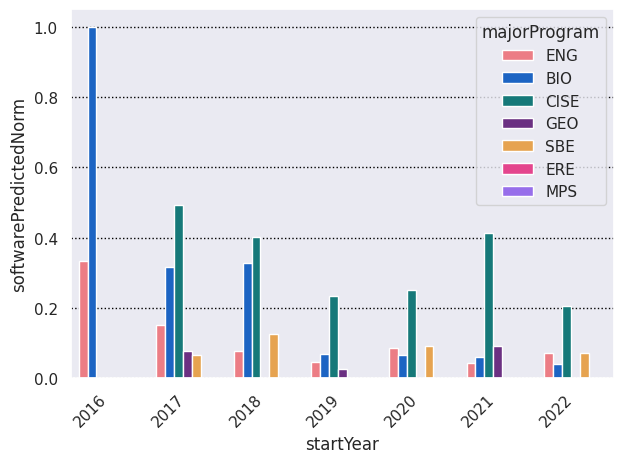

In [8]:
# Normalize per year
norms = []
for startYear in df.startYear.unique():
    year_data = df[df.startYear == startYear]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "startYear": startYear,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })

norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="startYear", y="softwarePredictedNorm", hue="majorProgram", order=[str(i) for i in range(2016, 2023)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

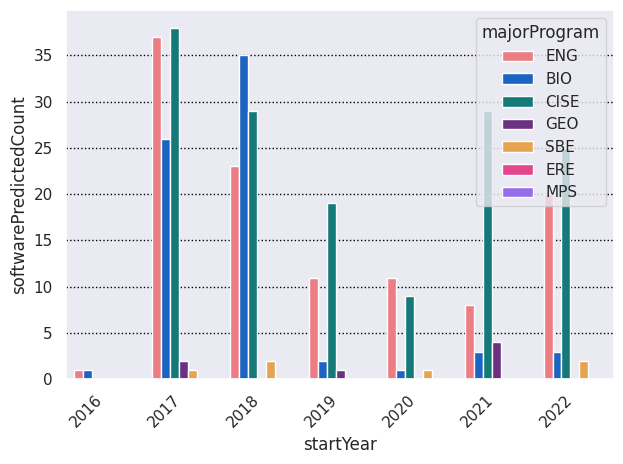

In [9]:
sns.barplot(data=norms, x="startYear", y="softwarePredictedCount", hue="majorProgram", order=[str(i) for i in range(2016, 2023)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

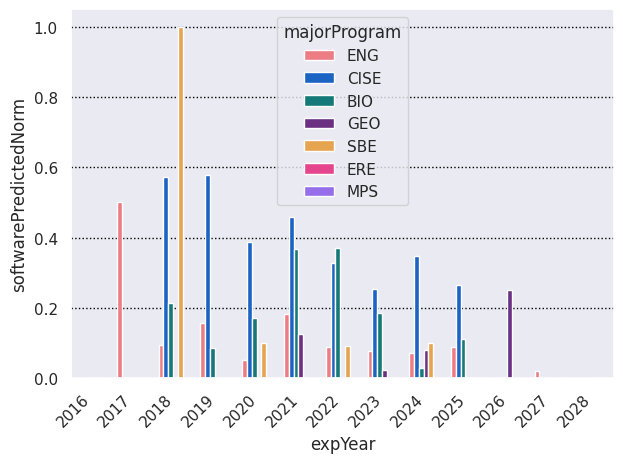

In [10]:
# Normalize per year
norms = []
for expYear in df.expYear.unique():
    year_data = df[df.expYear == expYear]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "expYear": expYear,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })


norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="expYear", y="softwarePredictedNorm", hue="majorProgram", order=[str(i) for i in range(2016, 2029)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

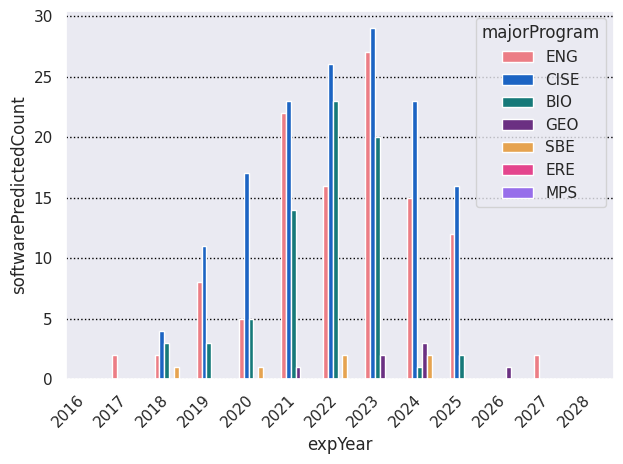

In [11]:
sns.barplot(data=norms, x="expYear", y="softwarePredictedCount", hue="majorProgram", order=[str(i) for i in range(2016, 2029)])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

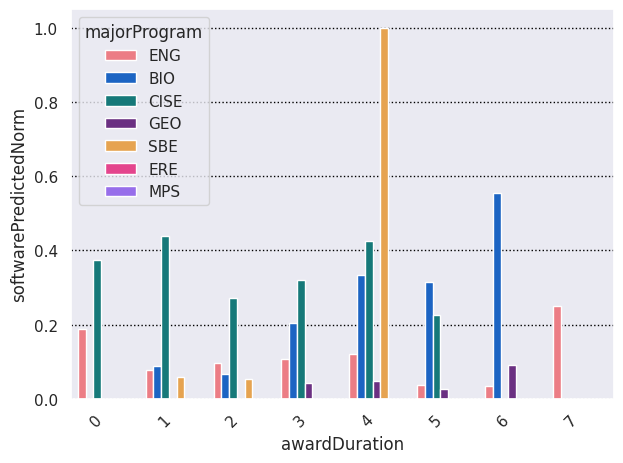

In [12]:
# Normalize per year
norms = []
for awardDuration in df.awardDuration.unique():
    year_data = df[df.awardDuration == awardDuration]
    for i, count in year_data.majorProgram.value_counts().items():
        program_preds = year_data[year_data.majorProgram == i].prediction.value_counts()
        try:
            predicted_count = program_preds.loc["software-predicted"]
        except KeyError:
            predicted_count = 0
        try:
            not_predicted_count = program_preds.loc["software-not-predicted"]
        except KeyError:
            not_predicted_count = 0

        norms.append({
            "majorProgram": i,
            "awardDuration": awardDuration,
            "totalCount": count,
            "softwarePredictedCount": predicted_count,
            "softwareNotPredictedCount": not_predicted_count,
            "softwarePredictedNorm": predicted_count / count,
            "softwareNotPredictedNorm": not_predicted_count / count,
        })


norms = pd.DataFrame(norms)
sns.barplot(data=norms, x="awardDuration", y="softwarePredictedNorm", hue="majorProgram")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()